# Data Modelling to Predict Loan Defaulters
  

### Contents

    1. Loading & Understanding Dataset and target & predictor variables.
    2. Data Analysis.
    3. Feature Engineering.
    4. Feature Selection.
    5. Splitting Dataset into Train & Test as per mentioned dates for Model Buling.
    6. Model Building.
    7. Conclusion.

#### 1. Loading & Understanding Dataset and target & predictor variables

    a. Load required packages & libraries.
    b. Load dataset.
    c. Check dataset info -  head, tail, datatypes, dimensions etc.
    d. Check for target variable class imbalance.

#### a. Load Required packages & libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import sklearn
import warnings
from google.colab import files

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore", category=FutureWarning)

#### b. Loading dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
bl = pd.read_table('/content/drive/MyDrive/Colab Notebooks/XYZCorp_LendingData.txt', low_memory=False)

#### c. Check dataset information - info, head, tail, dimensions etc..

In [4]:
bl.shape

(855969, 73)

In [5]:
bl.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
bl.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,905xx,CA,28.69,0.0,Sep-2004,0.0,NaN,77.0,9.0,1.0,14037.0,82.1,15.0,f,7055.47,7055.47,3971.88,3971.88,2944.53,1027.35,0.0,0.0,0.0,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,Jan-2015,n,NaN,home_improvement,Home improvement,072xx,NJ,3.90,0.0,Mar-1974,1.0,26.0,NaN,5.0,0.0,8621.0,84.5,23.0,f,16933.26,16933.26,9532.39,9532.39,7066.74,2465.65,0.0,0.0,0.0,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,29.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,140285.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,378xx,TN,30.90,0.0,Sep-2003,0.0,NaN,84.0,9.0,1.0,11031.0,61.3,22.0,w,11155.50,11155.50,3769.74,3769.74,1844.50,1925.24,0.0,0.0,0.0,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,34178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,Jan-2015,n,NaN,debt_consolidation,Debt consolidation,010xx,MA,27.19,1.0,Oct-2003,2.0,22.0,NaN,17.0,0.0,8254.0,30.6,20.0,w,10447.31,10447.31,3787.67,3787.67,1552.69,2234.98,0.0,0.0,0.0,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,58418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,RENT,100000.0,Verified,Jan-2015,n,NaN,credit_card,Credit card refinancing,331xx,FL,10.83,0.0,Dec-2001,1.0,NaN,110.0,8.0,1.0,33266.0,79.8,10.0,f,14110.94,14110.94,7943.76,7943.76,5889.06,2054.70,0.0,0.0,0.0,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [7]:
bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [8]:
bl.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [9]:
bl.describe(include = ['O'])  # summary of categorical variables

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806526,812908,855969,855969,855969,855969,121812,855969,855936,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290912,11,6,3,103,2,120335,14,60991,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,231,505392,398089,9466,125172,6433,442555,467510,534094,701687,855527,252


#### d. Check target variable - type, distribution, class imbalance etc....
Target variable is 'default_ind' - which is Loan defaulting indicator, here value 0 mean - will not default on loan and value - 1 means may default on loan.

0    809502
1     46467
Name: default_ind, dtype: int64


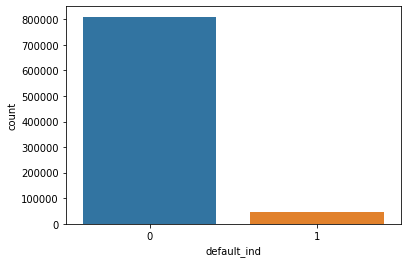

In [10]:
print(bl.default_ind.value_counts())
sns.countplot('default_ind',data=bl) 
# We can see heavy class imbalance here, which we will have to deal with later, during model building 

#### 2. Data Analysis: 
a.   Find out missing values.<br>
b.   Understand all categorical variables, their credibility and levels.<br>
c.   Understand all numerical variabels & their distribution.<br>



#### a. Find out missing values in data

In [11]:
bl_null = pd.DataFrame({'Features': [var for var in bl.columns if bl[var].isnull().sum() > 1], 
                        'Null Values' : [bl[var].isnull().sum() for var in bl.columns if bl[var].isnull().sum() > 1],
                        '% missing' : [bl[var].isnull().sum() / bl.shape[0] *100 for var in bl.columns if bl[var].isnull().sum() > 1 ] })
bl_null.sort_values(by=['% missing'], ascending=False, ignore_index=True)

,Features,Null Values,% missing
0,dti_joint,855529,99.948596
1,annual_inc_joint,855527,99.948363
2,verification_status_joint,855527,99.948363
3,il_util,844360,98.643759
4,mths_since_rcnt_il,843035,98.488964
5,inq_last_12m,842681,98.447607
6,open_il_24m,842681,98.447607
7,open_il_12m,842681,98.447607
8,open_il_6m,842681,98.447607
9,open_acc_6m,842681,98.447607


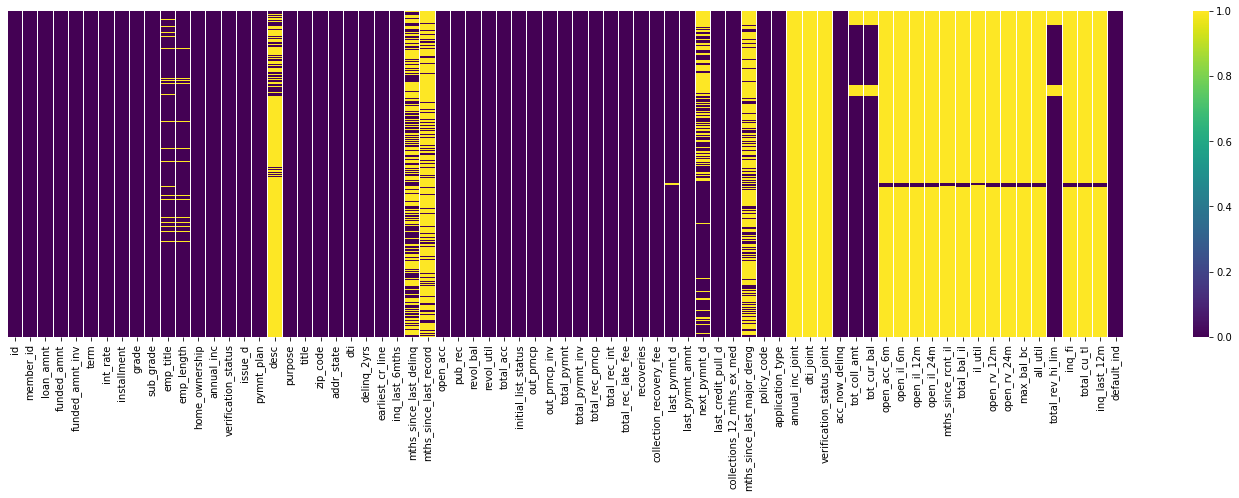

In [12]:
# Visualize missing data
plt.figure(figsize=(25,6))
sns.heatmap(bl.isnull(),yticklabels=False,cmap="viridis")
plt.show()

1. We have 32 columns with missing values.
2. 21 columns are where missing value are more than 50%. Keeping these columns will not serve any purpose for our model
3. We will impute values accordingly for columns with missing values more than 30% 

In [13]:
# Let's drop columns where Null values are more than 30% of total values in columns
bl.dropna('columns', 'any', thresh=(0.70*len(bl)), inplace=True )
print(bl.shape)

(855969, 52)


In [14]:
# Dropping some more unnecessary columns like idenfiers & description columns
# we dropping description columns since these description are provided by borrower, which are not an indicator whether borrower will default on loans or not
bl.drop(['id','member_id','emp_title','zip_code','policy_code','title'],axis=1, inplace=True)
bl.shape

(855969, 46)

In [15]:
# Dropping more columns
del bl['pymnt_plan']                    # payment plan has 99%+ 'Y' values, so keeping it will not be useful for us
del bl['next_pymnt_d']                  # Next payment is not a correct predictor for deafult
del bl['last_pymnt_d']                  # since it is date variable, not useful for us
del bl['last_credit_pull_d']            # date variable
del bl['earliest_cr_line']              # date variable

#### b. Understand Categorical Data

In [16]:
cat_features = bl.select_dtypes(include='object')     # Selecting only categorical features
print(cat_features.shape)
cat_features.info()

(855969, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 855969 non-null  object
 1   grade                855969 non-null  object
 2   sub_grade            855969 non-null  object
 3   emp_length           812908 non-null  object
 4   home_ownership       855969 non-null  object
 5   verification_status  855969 non-null  object
 6   issue_d              855969 non-null  object
 7   purpose              855969 non-null  object
 8   addr_state           855969 non-null  object
 9   initial_list_status  855969 non-null  object
 10  application_type     855969 non-null  object
dtypes: object(11)
memory usage: 71.8+ MB


In [17]:
cat_features.describe()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,initial_list_status,application_type
count,855969,855969,855969,812908,855969,855969,855969,855969,855969,855969,855969
unique,2,7,35,11,6,3,103,14,51,2,2
top,36 months,B,B3,10+ years,MORTGAGE,Source Verified,Oct-2015,debt_consolidation,CA,f,INDIVIDUAL
freq,600221,247998,54958,282090,429106,318178,48212,505392,125172,442555,855527


*   There are 11 categorical columns in dataset, out of which 5 are dates.
*   Subgrade, Address state, Purpose have lot of levels (> 13) which need to dealt with proper encoding method.



#### c. Understanding Numerical Data

In [18]:
num_features = bl.select_dtypes(include= ['float64', 'int64'])
print(num_features.shape)
num_features.info()

(855969, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   855969 non-null  float64
 1   funded_amnt                 855969 non-null  float64
 2   funded_amnt_inv             855969 non-null  float64
 3   int_rate                    855969 non-null  float64
 4   installment                 855969 non-null  float64
 5   annual_inc                  855969 non-null  float64
 6   dti                         855969 non-null  float64
 7   delinq_2yrs                 855969 non-null  float64
 8   inq_last_6mths              855969 non-null  float64
 9   open_acc                    855969 non-null  float64
 10  pub_rec                     855969 non-null  float64
 11  revol_bal                   855969 non-null  float64
 12  revol_util                  855523 non-null  float64
 13  t

In [19]:
num_features.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,855969.000000,7.886560e+05,7.886560e+05,7.886560e+05,855969.000000
mean,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,0.004944,2.254129e+02,1.397662e+05,3.216357e+04,0.054286
std,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,0.077333,1.048945e+04,1.539385e+05,3.769964e+04,0.226581
min,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,0.000000,0.000000e+00,2.987000e+04,1.400000e+04,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,0.000000,0.000000e+00,8.100850e+04,2.380000e+04,0.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,1.000000,14.000000,0.000000,2.085700e+04,73.500000,32.000000,13528.800000,13522.510000,10744.803649,10697.33000,8000.000000,2233.980000,0.000000,0.000000,0.000000,849.160000,0.000000,0.000000,0.000000e+00,2.087032e+05,3.990000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,8.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,49372.860000,57777.579870,57777.58000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,14.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


*   Huge difference can be seen in 75% value & maximum value for almost all variables, which suggests presence of outliers.


#### 3. Feature Engineering:
a.   Missing Values Treatment<br>
b.   Categorical variables encoding<br>

#### a. Missing Values Treatment 

In [20]:
# Dropping all null values, for better understanding, please refer to other code with missing value imputation
bl.dropna(axis=0, how='any', inplace=True)
bl.shape

(747260, 41)

In [21]:
bl.isnull().sum().any()

False

#### b. Encoding Categorical Variables

In [22]:
# Converting issue_d into datetime format for splitting data into train & test
bl['issue_d'] = pd.to_datetime(bl['issue_d'], infer_datetime_format=True)

In [23]:
from sklearn import preprocessing

In [24]:
# label endcoding for the object datatypes except the column "issue_d"
for var in bl.columns:
    if bl[var].dtypes == 'object':
        le = preprocessing.LabelEncoder()
        le = le.fit(bl[var])
        bl[var] = le.transform(bl[var])
        print('Completed Label encoding on',var)

Completed Label encoding on term
Completed Label encoding on grade
Completed Label encoding on sub_grade
Completed Label encoding on emp_length
Completed Label encoding on home_ownership
Completed Label encoding on verification_status
Completed Label encoding on purpose
Completed Label encoding on addr_state
Completed Label encoding on initial_list_status
Completed Label encoding on application_type


In [25]:
bl.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
count,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,7.472600e+05,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,7.472600e+05,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,7.472600e+05,7.472600e+05,7.472600e+05,747260.000000
mean,15146.778732,15146.758391,15140.386131,0.310498,13.246891,447.013091,1.794770,10.938814,3.633893,2.871179,7.698438e+04,1.001552,2.468757,23.225151,18.346379,0.328820,0.668149,11.772483,0.200818,1.735136e+04,55.437165,25.589123,0.525168,9052.533496,9048.933891,7309.366494,7306.080902,5550.897644,1716.055293,0.251147,42.162412,4.469725,2210.047381,0.015431,0.000517,0.005398,2.215355e+02,1.422791e+05,3.234609e+04,0.045821
std,8450.166859,8450.144571,8446.815628,0.462698,4.395776,244.311865,1.299977,6.433531,3.184283,1.923009,6.585665e+04,0.779713,2.135332,15.156809,8.286919,0.883293,0.956833,5.361282,0.595620,2.292366e+04,23.445834,11.846077,0.499367,8520.693913,8517.211514,7672.459739,7668.620141,6537.423235,2007.938529,3.211368,383.594023,54.032419,4924.660097,0.139285,0.022722,0.080913,1.076314e+04,1.552109e+05,3.805473e+04,0.209096
min,1000.000000,1000.000000,925.000000,0.000000,5.320000,23.260000,0.000000,0.000000,0.000000,0.000000,3.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8750.000000,8750.000000,8725.000000,0.000000,9.990000,269.520000,1.000000,6.000000,1.000000,1.000000,4.800000e+04,0.000000,2.000000,9.000000,12.120000,0.000000,0.000000,8.000000,0.000000,6.705000e+03,38.300000,17.000000,0.000000,678.207500,678.030000,1866.990000,1866.665000,1168.370000,440.640000,0.000000,0.000000,0.000000,292.400000,0.000000,0.000000,0.000000,0.000000e+00,3.095500e+04,1.410000e+04,0.000000
50%,14000.000000,14000.000000,14000.000000,0.000000,12.990000,392.810000,2.000000,10.000000,2.000000,1.000000,6.500000e+04,1.000000,2.000000,23.000000,17.850000,0.000000,0.000000,11.000000,0.000000,1.221100e+04,56.200000,24.000000,1.000000,7454.490000,7452.760000,4656.235000,4655.760000,3023.810000,1062.330000,0.000000,0.000000,0.000000,469.290000,0.000000,0.000000,0.000000,0.000000e+00,8.401800e+04,2.400000e+04,0.000000
75%,20000.000000,20000.000000,20000.000000,1.000000,16.200000,585.080000,3.000000,15.000000,6.000000,5.000000,9.132100e+04,2.000000,2.000000,36.000000,24.210000,0.000000,1.000000,15.000000,0.000000,2.133000e+04,73.600000,32.000000,1.000000,14317.772500,14313.690000,10199.619411,10193.362500,7437.475000,2202.240000,0.000000,0.000000,0.000000,812.480000,0.000000,0.000000,0.000000,0.000000e+00,2.120675e+05,4.010000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,1.000000,28.990000,1445.460000,6.000000,34.000000,10.000000,5.000000,9.500000e+06,2.000000,13.000000,50.000000,380.530000,39.000000,8.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,1.000000,49372.860000,49372.860000,56087.909922,56047.850000,35000.000000,21840.000000,358.680000,33520.270000,5694.093600,36475.590000,20.000000,1.000000,14.000000,9.

#### 4.   Feature Selection:

#### a.   Using Boruta

In [109]:
x = bl.drop(['default_ind','issue_d'], axis = 1)
y = bl['default_ind']

In [ ]:
pip install Boruta

In [ ]:
import boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
x = np.array(x)
y = np.array(y)

In [ ]:
rf = RandomForestClassifier()
Borutaa = BorutaPy(rf, n_estimators='auto', verbose=2, max_iter=15)

In [ ]:
Borutaa.fit(x,y)

Iteration: 	1 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	2 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	3 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	4 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	5 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	6 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	7 / 15
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	8 / 15
Confirmed: 	23
Tentative: 	1
Rejected: 	15
Iteration: 	9 / 15
Confirmed: 	23
Tentative: 	1
Rejected: 	15
Iteration: 	10 / 15
Confirmed: 	23
Tentative: 	1
Rejected: 	15
Iteration: 	11 / 15
Confirmed: 	23
Tentative: 	1
Rejected: 	15
Iteration: 	12 / 15
Confirmed: 	23
Tentative: 	1
Rejected: 	15
Iteration: 	13 / 15
Confirmed: 	23
Tentative: 	1
Rejected: 	15
Iteration: 	14 / 15
Confirmed: 	23
Tentative: 	1
Rejected: 	15


BorutaPy finished running.

Iteration: 	15 / 15
Confirmed: 	23
Tentative: 	1
Rejected: 	15


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=None, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=69, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F7B0E784050,
                                          verbose=0, warm_start=False),
         max_iter=15, n_estimators='

In [ ]:
Borutaa.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True])

In [ ]:
Borutaa.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1, 10, 13,  1,  6,  7,  7,  1, 12,  9,
        4, 14,  1,  1,  3,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 15,
       17, 16, 11,  2,  1])

### **5. Splitting Dataset into Train & Test as per mentioned dates for Model Buling**

In [26]:
# Splitting Data in train & test
train = bl[bl['issue_d'] < '2015-6-01']
test = bl[bl['issue_d'] >= '2015-6-01']
print(train.shape)
print(test.shape)

(505328, 41)
(241932, 41)


In [27]:
bl.isnull().sum().any()

False

In [28]:
# Remove issue_d feature
del train['issue_d']
del test['issue_d']

In [29]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
39694,27050.0,27050.0,27050.0,0,10.99,885.46,1,6,1,4,55000.0,2,2,22,22.87,0.0,0.0,14.0,0.0,36638.0,61.2,27.0,1,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,0.0,0,0.0,0.0,114834.0,59900.0,0
39695,9750.0,9750.0,9750.0,0,13.98,333.14,2,10,0,5,26000.0,0,2,4,25.12,0.0,0.0,12.0,0.0,7967.0,52.8,28.0,0,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,0.0,0,0.0,0.0,14123.0,15100.0,0
39696,12000.0,12000.0,12000.0,0,6.62,368.45,0,1,1,1,105000.0,0,2,6,14.05,0.0,1.0,12.0,0.0,13168.0,21.6,22.0,1,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,0,0.0,0.0,267646.0,61100.0,0
39697,12000.0,12000.0,12000.0,0,13.53,407.40,1,9,1,5,40000.0,1,2,32,16.94,0.0,0.0,7.0,2.0,5572.0,68.8,32.0,1,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,0,0.0,15386.0,13605.0,8100.0,0
39698,15000.0,15000.0,15000.0,0,8.90,476.30,0,4,2,1,63000.0,0,2,9,16.51,0.0,0.0,8.0,0.0,11431.0,74.2,29.0,1,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,0,0.0,1514.0,272492.0,15400.0,0


In [30]:
# Output of Boruta
b = [ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, None]
print(len(b))
print(len(train.columns))

40
40


In [31]:
# Selecting featues given as true by Boruta
ftimp = pd.DataFrame({'Features': train.columns, 'Important': b})
ftimp.sort_values(by='Important', ascending=False)

,Features,Important
0,loan_amnt,True
14,dti,True
32,last_pymnt_amnt,True
31,collection_recovery_fee,True
30,recoveries,True
29,total_rec_late_fee,True
28,total_rec_int,True
27,total_rec_prncp,True
26,total_pymnt_inv,True
25,total_pymnt,True


In [32]:
# Train Test Split
x_train = train.drop(['default_ind', 'tot_coll_amt', 'acc_now_delinq', 'application_type', 'collections_12_mths_ex_med',
                      'delinq_2yrs', 'inq_last_6mths', 'home_ownership', 'verification_status', 'purpose',
                      'initial_list_status', 'total_acc', 'addr_state', 'pub_rec', 'open_acc', 'emp_length' ], axis=1)
y_train = train['default_ind']
x_test = test.drop(['default_ind', 'tot_coll_amt', 'acc_now_delinq', 'application_type', 'collections_12_mths_ex_med',
                      'delinq_2yrs', 'inq_last_6mths', 'home_ownership', 'verification_status', 'purpose',
                      'initial_list_status', 'total_acc', 'addr_state', 'pub_rec', 'open_acc', 'emp_length' ], axis=1)
y_test = test['default_ind']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(505328, 24)
(505328,)
(241932, 24)
(241932,)


#### Removing Class Imbalance:

In [33]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


**a. Oversampling using SMOTE technique**

In [34]:
# a. Using SMOTE technique
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print('Before SMOTE: ', Counter(y_train))
print('After SMOTE: ', Counter(y_train_smote))

Before SMOTE:  Counter({0: 471375, 1: 33953})
After SMOTE:  Counter({0: 471375, 1: 471375})


**b. Undersampling using Near Miss Technique**

In [35]:
# Undersampling using near miss technique
from imblearn.under_sampling import NearMiss
nm=NearMiss()
x_train_nm, y_train_nm = nm.fit_resample(x_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_nm))

Original dataset shape Counter({0: 471375, 1: 33953})
Resample dataset shape Counter({0: 33953, 1: 33953})


#### 5. Model Building:
1.   Logistic Regression
2.   Decision Tree
3.   Random Forest
4.   Adaboost
5.   ANN

#### 1. Logistic Regression

In [36]:
pip install scikit-plot

In [37]:
import scikitplot as skplt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lgr = LogisticRegression()

#### a. With Unbalanced data

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [40]:
lgr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [41]:
# Prediction on test data
lgr_pred = lgr.predict(x_test)
print(classification_report(lgr_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241666
           1       0.80      0.86      0.83       266

    accuracy                           1.00    241932
   macro avg       0.90      0.93      0.91    241932
weighted avg       1.00      1.00      1.00    241932



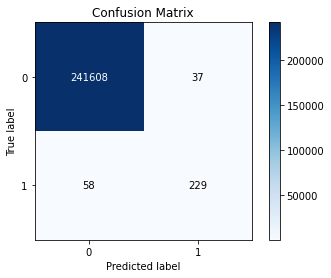

In [42]:
skplt.metrics.plot_confusion_matrix(y_test, lgr_pred)

#### b. With Oversampling data

In [43]:
lgr.fit(x_train_smote, y_train_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [44]:
# Prediction on test data
lgr_os_pred = lgr.predict(x_test)
print(classification_report(y_test, lgr_os_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241645
           1       0.68      0.80      0.73       287

    accuracy                           1.00    241932
   macro avg       0.84      0.90      0.87    241932
weighted avg       1.00      1.00      1.00    241932



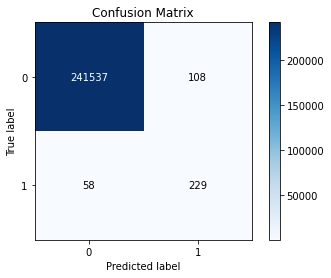

In [45]:
skplt.metrics.plot_confusion_matrix(y_test, lgr_os_pred)

**c. With Undersampling Data**

In [46]:
lgr.fit(x_train_nm, y_train_nm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [47]:
# Prediction on test data
lgr_us_pred = lgr.predict(x_test)
print(classification_report(y_test, lgr_us_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86    241645
           1       0.00      0.85      0.01       287

    accuracy                           0.75    241932
   macro avg       0.50      0.80      0.43    241932
weighted avg       1.00      0.75      0.86    241932



In [48]:
print(classification_report(y_test, lgr_us_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86    241645
           1       0.00      0.85      0.01       287

    accuracy                           0.75    241932
   macro avg       0.50      0.80      0.43    241932
weighted avg       1.00      0.75      0.86    241932



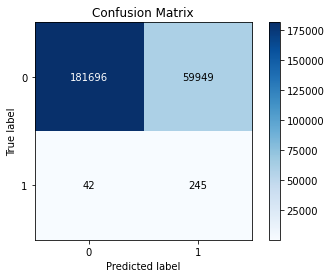

In [49]:
skplt.metrics.plot_confusion_matrix(y_test, lgr_us_pred)

#### d. Using  Grid Search 

In [50]:
# Using Grid Search CV
from sklearn.model_selection import KFold
from scipy.stats import loguniform

In [51]:
model = LogisticRegression()                   # defining model
kf = KFold(n_splits=5)        # K fold cross validation
# define search space
space = dict()
space['C'] = [0.0001, 0.001, 0.01, 0.1, 1]
# Log-uniform is useful for searching penalty values as we often explore values at different orders of magnitude, 
# at least as a first step.

In [52]:
# Define Search
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(model, space, scoring='recall', n_jobs=None, cv=5, verbose=10)
#search = RandomizedSearchCV(model, space, n_iter)

In [53]:
# execute search
result = search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START C=0.0001....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 1/5; 1/5] END ..................................C=0.0001; total time=   8.3s
[CV 2/5; 1/5] START C=0.0001....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 2/5; 1/5] END ..................................C=0.0001; total time=   8.0s
[CV 3/5; 1/5] START C=0.0001....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 3/5; 1/5] END ..................................C=0.0001; total time=   8.4s
[CV 4/5; 1/5] START C=0.0001....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 4/5; 1/5] END ..................................C=0.0001; total time=   8.2s
[CV 5/5; 1/5] START C=0.0001....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 5/5; 1/5] END ..................................C=0.0001; total time=   8.2s
[CV 1/5; 2/5] START C=0.001.....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 1/5; 2/5] END ...................................C=0.001; total time=   8.3s
[CV 2/5; 2/5] START C=0.001.....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 2/5; 2/5] END ...................................C=0.001; total time=   8.0s
[CV 3/5; 2/5] START C=0.001.....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 3/5; 2/5] END ...................................C=0.001; total time=   8.2s
[CV 4/5; 2/5] START C=0.001.....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 4/5; 2/5] END ...................................C=0.001; total time=   8.2s
[CV 5/5; 2/5] START C=0.001.....................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 5/5; 2/5] END ...................................C=0.001; total time=   8.2s
[CV 1/5; 3/5] START C=0.01......................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 1/5; 3/5] END ....................................C=0.01; total time=   8.3s
[CV 2/5; 3/5] START C=0.01......................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 2/5; 3/5] END ....................................C=0.01; total time=   8.0s
[CV 3/5; 3/5] START C=0.01......................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 3/5; 3/5] END ....................................C=0.01; total time=   8.3s
[CV 4/5; 3/5] START C=0.01......................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 4/5; 3/5] END ....................................C=0.01; total time=   7.9s
[CV 5/5; 3/5] START C=0.01......................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 5/5; 3/5] END ....................................C=0.01; total time=   8.4s
[CV 1/5; 4/5] START C=0.1.......................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 1/5; 4/5] END .....................................C=0.1; total time=   8.2s
[CV 2/5; 4/5] START C=0.1.......................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 2/5; 4/5] END .....................................C=0.1; total time=   8.2s
[CV 3/5; 4/5] START C=0.1.......................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 3/5; 4/5] END .....................................C=0.1; total time=   8.4s
[CV 4/5; 4/5] START C=0.1.......................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 4/5; 4/5] END .....................................C=0.1; total time=   8.0s
[CV 5/5; 4/5] START C=0.1.......................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 5/5; 4/5] END .....................................C=0.1; total time=   8.4s
[CV 1/5; 5/5] START C=1.........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 1/5; 5/5] END .......................................C=1; total time=   8.3s
[CV 2/5; 5/5] START C=1.........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 2/5; 5/5] END .......................................C=1; total time=   8.4s
[CV 3/5; 5/5] START C=1.........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 3/5; 5/5] END .......................................C=1; total time=   8.3s
[CV 4/5; 5/5] START C=1.........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 4/5; 5/5] END .......................................C=1; total time=   8.1s
[CV 5/5; 5/5] START C=1.........................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV 5/5; 5/5] END .......................................C=1; total time=   8.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9572636398907071
Best Hyperparameters: {'C': 0.01}


In [55]:
# Running Logistic Regression using Grid searh result
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lgr_gs = LogisticRegression(C=0.01)        # Best result for C=0.01
lgr_gs.fit(x_train, y_train)                      

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01)

In [56]:
# Prediction on test data
lgr_gs_pred = lgr_gs.predict(x_test)

In [57]:
print(classification_report(y_test, lgr_gs_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241645
           1       0.95      0.80      0.87       287

    accuracy                           1.00    241932
   macro avg       0.97      0.90      0.93    241932
weighted avg       1.00      1.00      1.00    241932



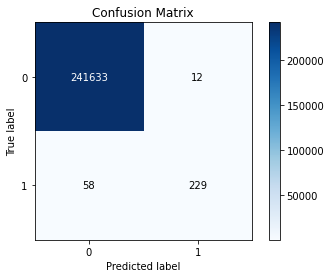

In [58]:
skplt.metrics.plot_confusion_matrix(y_test, lgr_gs_pred)

#### 2. Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [60]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [61]:
# Prediction on test data
dt_pred = dt.predict(x_test)

In [62]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.29      0.45    241645
           1       0.00      1.00      0.00       287

    accuracy                           0.29    241932
   macro avg       0.50      0.64      0.23    241932
weighted avg       1.00      0.29      0.45    241932



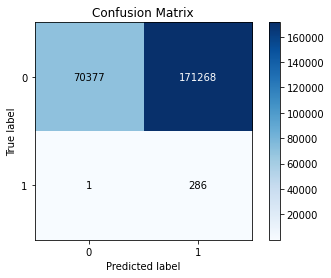

In [63]:
skplt.metrics.plot_confusion_matrix(y_test, dt_pred)

#### 3. Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
# Prediction on test data
rf_pred = rf.predict(x_test)

In [66]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.35      0.52    241645
           1       0.00      1.00      0.00       287

    accuracy                           0.35    241932
   macro avg       0.50      0.68      0.26    241932
weighted avg       1.00      0.35      0.52    241932



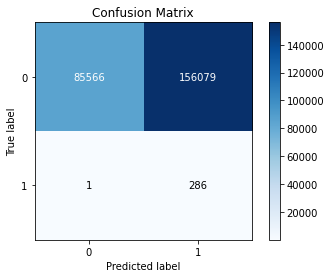

In [67]:
skplt.metrics.plot_confusion_matrix(y_test, rf_pred)

#### 4. Adaboost Algorithm

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
dt = DecisionTreeClassifier()    # adaptive boosting will run top of a classifier

In [70]:
adb = AdaBoostClassifier()

In [71]:
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [72]:
# Prediction on test data
adb_pred = adb.predict(x_test)

In [73]:
print(classification_report(y_test, adb_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    241645
           1       0.02      0.82      0.04       287

    accuracy                           0.95    241932
   macro avg       0.51      0.89      0.51    241932
weighted avg       1.00      0.95      0.97    241932



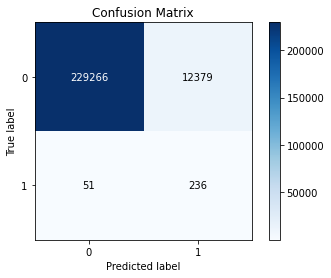

In [74]:
skplt.metrics.plot_confusion_matrix(y_test, adb_pred)

#### 5. Using ANN - Deep Learning

In [75]:
import tensorflow as tf
import keras
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())
print("Number of GPUs available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.keras.backend.set_floatx('float64')

[]
True
Number of GPUs available:  0


In [76]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)

In [77]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)        
# these lines are not manadatory, but we normalize, accuracy increases

In [78]:
model = tf.keras.Sequential()    # initialize the model
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))   # 1st layer
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))   # 2nd layer
model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu))   # 3rd layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))   # 4th layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))   # 5th layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.sigmoid)) # last layer
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

In [79]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=100)

Epoch 1/10
4043/4043 [==============================] - 67s 16ms/step - loss: 0.1078 - val_loss: 0.0169
Epoch 2/10
4043/4043 [==============================] - 64s 16ms/step - loss: 0.0196 - val_loss: 0.0166
Epoch 3/10
4043/4043 [==============================] - 64s 16ms/step - loss: 0.0196 - val_loss: 0.0176
Epoch 4/10
4043/4043 [==============================] - 64s 16ms/step - loss: 0.0177 - val_loss: 0.0163
Epoch 5/10
4043/4043 [==============================] - 65s 16ms/step - loss: 0.0181 - val_loss: 0.0163
Epoch 6/10
4043/4043 [==============================] - 64s 16ms/step - loss: 0.0163 - val_loss: 0.0170
Epoch 7/10
4043/4043 [==============================] - 65s 16ms/step - loss: 0.0174 - val_loss: 0.0163
Epoch 8/10
4043/4043 [==============================] - 65s 16ms/step - loss: 0.0163 - val_loss: 0.0162
Epoch 9/10
4043/4043 [==============================] - 68s 17ms/step - loss: 0.0168 - val_loss: 0.0159
Epoch 10/10
4043/4043 [==============================] - 68s 17m

In [80]:
# Prediction on test data
ann_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [82]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241645
           1       1.00      0.80      0.89       287

    accuracy                           1.00    241932
   macro avg       1.00      0.90      0.94    241932
weighted avg       1.00      1.00      1.00    241932



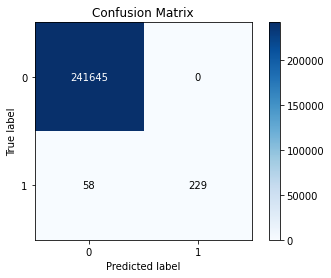

In [83]:
skplt.metrics.plot_confusion_matrix(y_test, ann_pred)


### 7. CONCLUSION
* We can consider ANN model as a final model, but we should go with Logistic Regression with Grid Search 
for final model. 
* This is because ANN will require substantial investment in state of art hardware (GPUs) but still improving 
model tab bit better.
* Hence conclude that our Logistic Regression with Grid Search CV is the best 
model for Predicting Loan Defaulters.